In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1) # x0^2 + x1^2 

In [3]:
def numerical_gradient_single_point(f, x, verbose=False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) # (x0, x1) 을 입력으로 받음 --> 2
       
    for idx in range(x.size): #축별로 계산
        v_keep = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(v_keep) + h #n차원 입력 중 해당 차원으로만 h를 더하고
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        # f(x-h) 계산
        x[idx] = float(v_keep) - h #n차원 입력 중 해당 차원으로만 h를 빼서
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) #n차원 방향의 차분을 구함 !
        x[idx] = v_keep # 값 복원
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

In [4]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [5]:
def gradient_descent(f, init_x, lr =0.1, step_num= 100, verbose = False):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        if verbose:
            print(x, grad)
        x -= lr * grad
        
    return x

In [6]:
def gradient_descent(f, init_x, lr =0.1, step_num= 100, return_history = False, verbose = False):
    x = init_x
    vx = np.zeros((step_num+1, 2)) # list 초기화
    vx[0] = x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        
        x -= lr * grad
        if verbose:
            print(x, grad)
            
        vx[i+1] = x # keep x in the history list
    
    if return_history:
        
        return np.array(x), np.array(vx)
    else:
        return np.array(x)

In [7]:
init_x = np.array([-2.0, 2.0])

In [8]:
learning_rate = 0.1

In [9]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose=False)

In [10]:
x_final

array([-4.07407195e-10,  4.07407195e-10])

😉 다음 조건에서의
```
lr =0.1, step_num= 100, init_x = np.array([-3.0, 4.0]):
```
예상결과
```
array([-6.11110793e-10,  8.14814391e-10])
```

In [11]:
x_hist.shape

(101, 2)

In [12]:
x_hist.ndim

2

In [13]:
Z_hist = function_2(np.array(x_hist))

In [14]:
np.shape(x_hist), np.shape(Z_hist)

((101, 2), (101,))

Text(0.5, 1.0, 'Learning rate = 0.1')

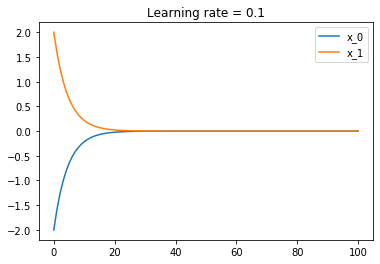

In [15]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

둘다 $x_0$ 과 $x_1$ 모두 0으로 수렴하는 것을 확인 가능 ! 

### 😂 Homework

* TODO I: lr = 10.0 으로, lr = 0.0001 등으로 변경하여 결과를 뽑아보고 논의해봅시다.
* TODO II: 3차원 공간에서의 좌표 궤적을 그려주세요 (lr = 0.001, 0.01, 0.1, 1.0, 10.0 등등)

ANSWER 2

In [16]:
from mpl_toolkits.mplot3d import Axes3D
x0 = np.arange(-2, 2, 0.25) 
x1 = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(x0, x1)
print(X.shape,Y.shape)

nrows = X.shape[0]
ncols = X.shape[1]

Xf = X.flatten()
Yf = Y.flatten()
arr = np.array([Xf, Yf]).transpose()

print(Xf.shape,Yf.shape)
print('arr.shape={} arr.ndim={}'.format(arr.shape, arr.ndim))

Z = function_2(arr)
print(Z.shape)

Z = np.reshape(Z, (nrows,ncols))
print(X.shape, Y.shape, Z.shape)

(16, 16) (16, 16)
(256,) (256,)
arr.shape=(256, 2) arr.ndim=2
(256,)
(16, 16) (16, 16) (16, 16)


In [17]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'z')

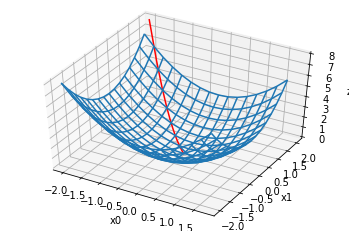

In [18]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z)
ax.plot(x_hist[:,0], x_hist[:,1], Z_hist,'r')

ax.view_init(elev=45., azim=300) #바꾸어보세요
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('z')